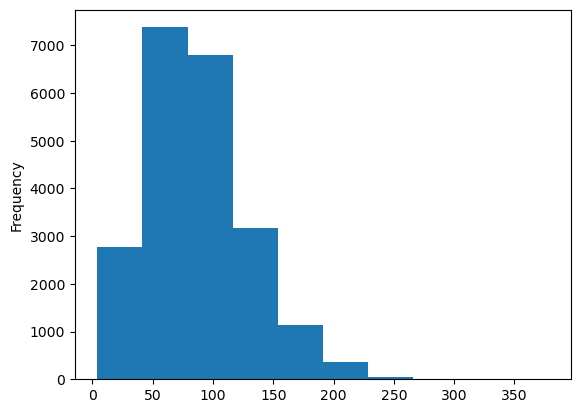

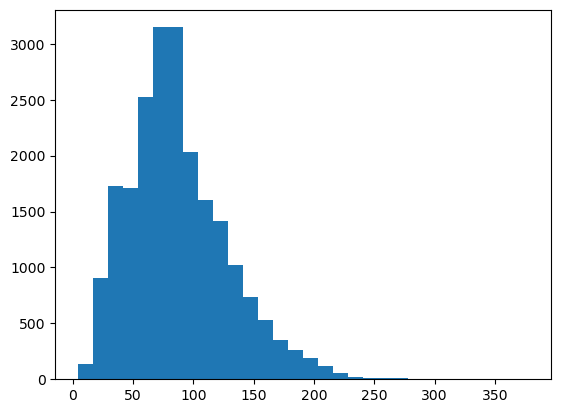

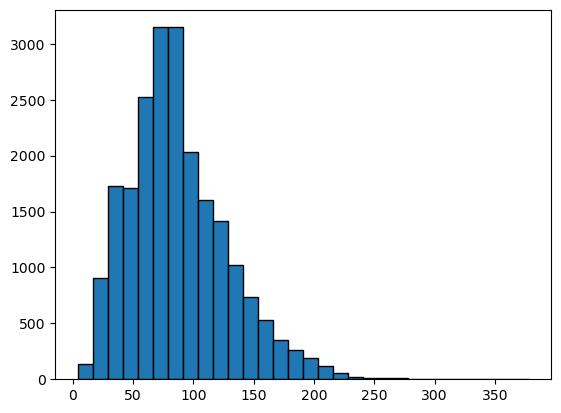

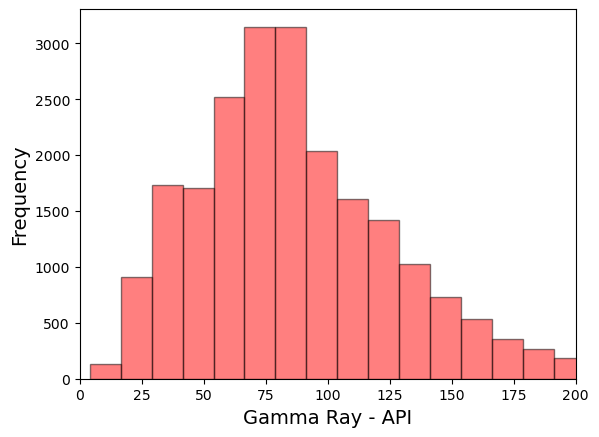

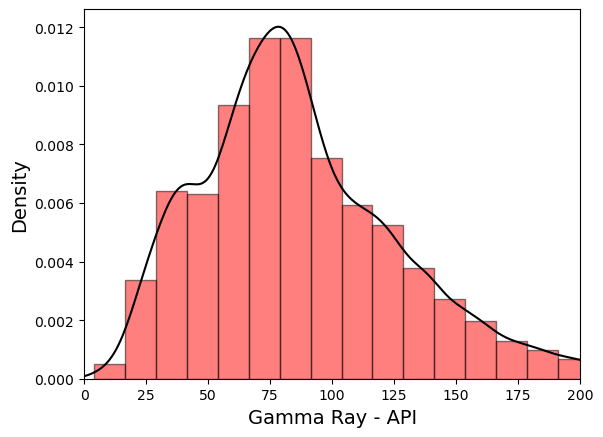

Mean: 	 87.29202045108585
P05: 	 29.4721
P95: 	 164.7949


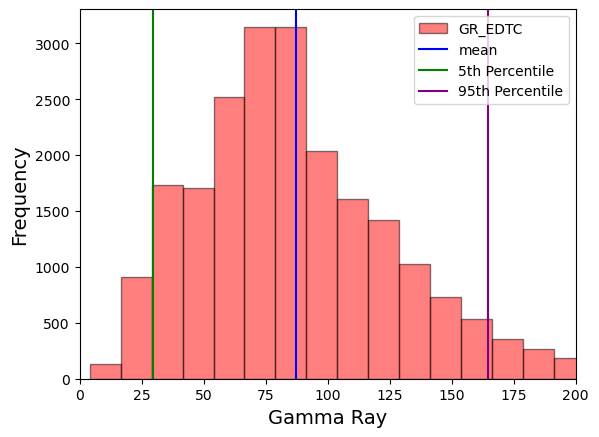

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

""" Log ASCII Standard (LAS) files are a common Oil & Gas industry format for storing and transferring well log data."""

las = lasio.read("/Users/amirhosseinakhondzadeh/Data/UnivUtah_Forge-16A-78-32_Spectral.las")
las.sections.keys()


df = las.df()
df.describe()


""" Creating Histograms Using pandas """
""" We can create a quick histogram using pandas without relying on importing other libraries. """
df['GR_EDTC'].plot(kind='hist')
plt.show()

""" Creating Histograms Using matplotlib """
""" We can also create the same histogram using matplotlib like so. """
#plt.hist(df['GR'])
#plt.show()

""" We can control this by specifying a set number for the bins argument, in this example we will set it to 30. """
plt.hist(df['GR_EDTC'], bins=30)
plt.show()

""" Let's tidy the plot up a little by adding edge colours to the bins. """
plt.hist(df['GR_EDTC'], bins=30, edgecolor='black')
plt.show()


""" To tidy the plot up further, we can assign both an x and y label, and also set the x-axis limits. """
plt.hist(df['GR_EDTC'], bins=30, color='red', alpha=0.5, edgecolor='black')
plt.xlabel('Gamma Ray - API', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,200)

plt.savefig('histogram.png', dpi=300)

plt.show()


""" In addition to the bars, we can also add in a kernel density estimation, which provides us with a line illustrating
 the distribution of the data. """
df['GR_EDTC'].plot(kind='hist', bins=30, color='red', alpha=0.5, density=True, edgecolor='black')
df['GR_EDTC'].plot(kind='kde', color='black')
plt.xlabel('Gamma Ray - API', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xlim(0,200)
plt.show()


""" These can be calculated using built in pandas functions: mean() and quantile(). """
mean = df['GR_EDTC'].mean()
p5 = df['GR_EDTC'].quantile(0.05)
p95 = df['GR_EDTC'].quantile(0.95)

print(f'Mean: \t {mean}')
print(f'P05: \t {p5}')
print(f'P95: \t {p95}')

""" To get an idea of where these points fall in relation to our data, we can add them onto the plot using axvline and
 passing in the calculated variables, a colour and a label. """
df['GR_EDTC'].plot(kind='hist', bins=30, color='red', alpha=0.5, edgecolor='black')
plt.xlabel('Gamma Ray', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,200)

plt.axvline(mean, color='blue', label='mean')
plt.axvline(p5, color='green', label='5th Percentile')
plt.axvline(p95, color='purple', label='95th Percentile')

plt.legend()
plt.show()